<a href="https://colab.research.google.com/github/anapbatista/Algebra-Linear/blob/main/Problema_de_Procrustes_Ortogonal_%C3%81lgebra_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trabalho Final - Álgebra Linear e Aplicações**
### *Tema: Problema de Procrustes Ortogonal*

* Ana Paula de Abreu Batista | Nº USP: 12688424
* Italo Carlos Martins Bresciani | Nº USP: 15461782
* Luiz Gabriel Correia dos Santos | Nº USP: 15639682
---

#### **Contexto e Problema**

No *Problema de Procrustes Ortogonal*, o objetivo é encontrar a melhor transformação ortogonal para alinhar um conjunto de pontos a outro, minimizando a diferença entre eles. Esse problema tem diversas aplicações, sendo uma delas na área da visão computacional, como a análise de forma e o reconhecimento de padrões.


#### **Solução do Problema**

A matriz de rotação é uma ferramenta matemática usada para girar pontos em um espaço bidimensional. O objetivo é alinhar duas coleções de pontos, como aqueles de duas imagens diferentes.

A ideia principal por trás da matriz de rotação é minimizar a diferença entre os pontos transformados de uma imagem e os pontos correspondentes de outra. Se não houvesse minimização, ocorreria um desalinhamento significativo, resultando em características correspondentes (como olhos, nariz e boca) que não estariam sobrepostas corretamente.

Isso pode ser expresso matematicamente como:

$$
R = \underset{\Omega}{\text{arg min}} \| \Omega A - B \|_F
$$

Onde:

* $R$ é a matriz de rotação que queremos encontrar.
* $A$ representa os pontos da primeira imagem.
* $B$ representa os pontos da segunda imagem.
* $\| \cdot \|_F$ denota a norma de Frobenius, que mede a distância entre as duas coleções de pontos.


Para resolver esse problema, utilizamos a Decomposição em Valores Singulares (SVD). A SVD nos permite fatorar a matriz de correlação $H$ entre os pontos das duas imagens, resultando em três matrizes: $U$, $\Sigma$, e $V^T$.

Onde:

* $U$  é a matriz ortogonal cujas colunas são os vetores singulares à esquerda, representando as direções principais dos dados em relação ao espaço da linha.

* $\Sigma$ é a matriz diagonal contendo os valores singulares de $H$, que indicam a importância de cada direção principal e a variação total dos dados.

* $V^T$ é a transposta de uma matriz ortogonal $V$, cujas colunas são os vetores singulares à direita, representando as direções dos dados em relação ao espaço da coluna.


Com essa fatoração, podemos representar a matriz de rotação $R$ como:

$$R = UV^T$$

Esse passo é crucial, pois nos fornece a rotação necessária para alinhar os pontos da imagem 2 aos da imagem 1, ou vice-versa.

Para garantir que a matriz $R$ preserve as propriedades de uma matriz de rotação, precisamos que $R$ seja uma matriz ortogonal, o que significa que $R^T R = I$ (onde $I$ é a matriz identidade).

Assim, a matriz de rotação $R$ que minimiza a diferença entre os pontos transformados de $A$ e $B$ é a que conseguimos através dessa abordagem. Esse conceito é fundamental em várias aplicações de processamento de imagem, como o alinhamento de faces.

#### **Aplicação Prática**
A aplicação prática desse tema escolhida é o ajuste de formas em duas imagens. Dado um conjunto de pontos que representam características faciais de uma pessoa em duas fotos diferentes, usou-se o *Problema de Procrustes Ortogonal* para alinhar esses pontos, ajustando uma imagem em relação à outra.

### **Direitos de Imagem**
Para respeitar os direitos de imagem e evitar a exposição pessoal, utilizou-se a *IA Influencer* ***Aitana Lopez*** como modelo para as fotos.

#### **Implementação**
1. Importar dois conjuntos de pontos que precisam ser alinhados.
2. Calcular a média de cada conjunto e centralizar os dados em torno da origem.
3. Aplicar a decomposição em valores singulares (SVD) para encontrar a matriz de rotação $R$.
4. Transformar os pontos usando a matriz $R$ para alinhar os conjuntos.
5. Visualizar os resultados para confirmar o alinhamento.


### **Referências**

1. Simon Ensemble. (2018). *Orthogonal Procrustes Problem.* Recuperado de [simonensemble.github.io](https://simonensemble.github.io/posts/2018-10-27-orthogonal-procrustes/)
2. Wikipedia. (n.d.). *Orthogonal Procrustes Problem.* Recuperado de [Wikipedia](https://en.wikipedia.org/wiki/Orthogonal_Procrustes_problem)
3. Hossain, T. (2021). *Understanding the Orthogonal Procrustes Problem.* Recuperado de [tamanna-hossain-kay.com](https://www.tamanna-hossain-kay.com/post/2021/06/28/orthogonal-procrustes/)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importando NumPy para cálculos matemáticos, matplotlib para visualização e OpenCV para carregar e mostrar as imagens.
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


In [ ]:
# Carregar as imagens
image1 = cv2.imread('/content/drive/MyDrive/Arquivos/aitana11.jpeg')
image2 = cv2.imread('/content/drive/MyDrive/Arquivos/aitana lopez2.jpeg')

# Converter para RGB para exibição com Matplotlib
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


In [ ]:
# Carregar classificadores Haarcascade
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Arquivos/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/Arquivos/haarcascade_eye.xml")
def detect_facial_points(image):
    # Detectar rosto
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    facial_points = []  # Lista para armazenar pontos de características faciais

    for (face_x, face_y, face_w, face_h) in faces:
        # Definir o rosto para a detecção de olhos
        roi_face = image[face_y:face_y+face_h, face_x:face_x+face_w]

        # Detectar olhos com restrições para evitar detecção incorreta
        eyes = eye_cascade.detectMultiScale(
            roi_face, scaleFactor=1.1, minNeighbors=5, minSize=(int(face_w * 0.2), int(face_h * 0.2))
        )

        eye_centers = []

        for (eye_x, eye_y, eye_w, eye_h) in eyes:
            # Considera apenas olhos na metade superior do rosto
            if eye_y < face_h * 0.5:
                eye_center = (int(face_x + eye_x + eye_w / 2), int(face_y + eye_y + eye_h / 2))
                eye_centers.append(eye_center)

        # Verifica se foram detectados olhos suficientes
        if len(eye_centers) >= 2:
            # Ordena os olhos da esquerda para a direita
            eye_centers = sorted(eye_centers, key=lambda e: e[0])

            left_eye_center = eye_centers[0]
            right_eye_center = eye_centers[1]
        else:
            left_eye_center = right_eye_center = None

        # Estima o ponto do queixo como uma posição abaixo do centro do rosto
        chin_center = (int(face_x + face_w * 0.5), int(face_y + face_h * 0.85))

        # Adiciona os pontos detectados à lista
        if left_eye_center is not None:
            facial_points.append(left_eye_center)
        if right_eye_center is not None:
            facial_points.append(right_eye_center)

        facial_points.append(chin_center)

    # Converte a lista para np.array se houver pontos válidos
    if len(facial_points) == 3:  # Precisamos de 3 pontos (dois olhos e um queixo)
        return np.array(facial_points)
    else:
        return None

# Detectar pontos faciais nas imagens
points_image1 = detect_facial_points(image1_rgb)
points_image2 = detect_facial_points(image2_rgb)

# Exibir os pontos
if points_image1 is not None:
    print("points_image1 =", points_image1)
else:
    print("Não foi possível detectar os pontos faciais corretamente na imagem 1.")

if points_image2 is not None:
    print("points_image2 =", points_image2)
else:
    print("Não foi possível detectar os pontos faciais corretamente na imagem 2.")


points_image1 = [[269 294]
 [376 304]
 [321 422]]
points_image2 = [[220 254]
 [334 256]
 [280 392]]


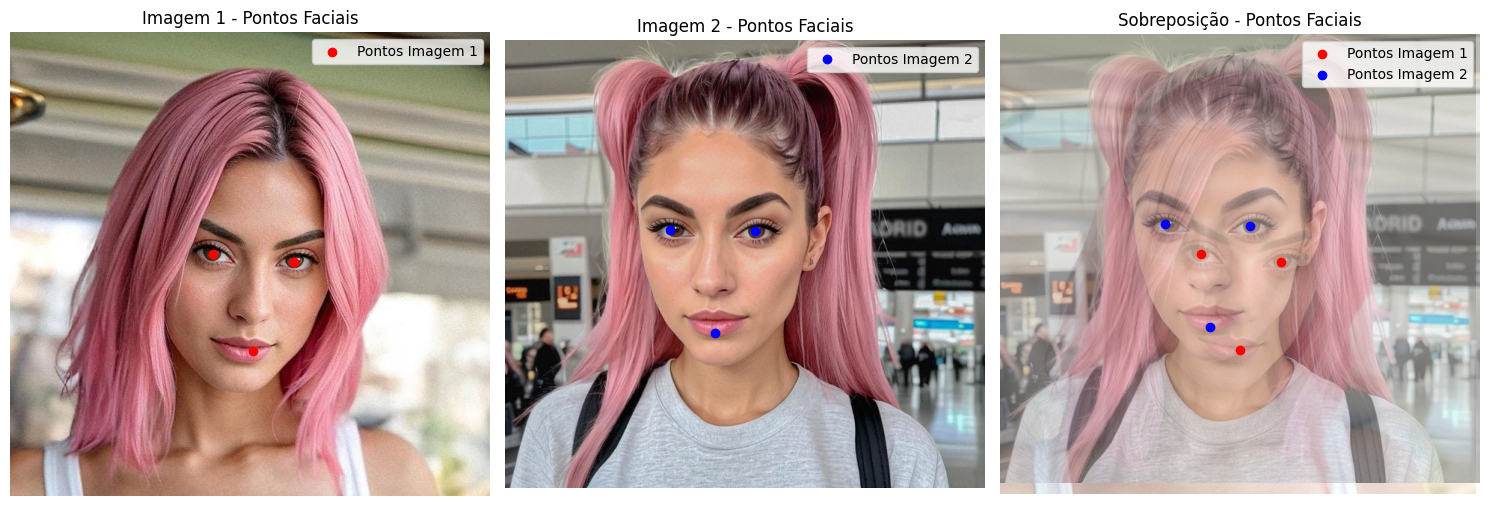

In [ ]:
# Visualizar as três imagens para comparação
plt.figure(figsize=(15, 5))

# Exibir a imagem 1 com os pontos
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='red', label='Pontos Imagem 1')
plt.title("Imagem 1 - Pontos Faciais")
plt.axis('off')
plt.legend()

# Exibir a imagem 2 com os pontos
plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='blue', label='Pontos Imagem 2')
plt.title("Imagem 2 - Pontos Faciais")
plt.axis('off')
plt.legend()

# Exibir sobreposição das imagens com os pontos
plt.subplot(1, 3, 3)
plt.imshow(image1_rgb, alpha=0.5)  # Imagem 1 com transparência
plt.imshow(image2_rgb, alpha=0.5)  # Imagem 2 com transparência
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='red', label='Pontos Imagem 1')
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='blue', label='Pontos Imagem 2')
plt.title("Sobreposição - Pontos Faciais")
plt.axis('off')
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

Para alinhar duas imagens, é essencial que os pontos de referência estejam centralizados em relação ao seu próprio centro. Por isso, subtrai-se a média dos pontos de cada imagem.

A média dos pontos é dada por:

$$
\text{mean} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

onde $x_i$ são as coordenadas dos pontos.

Depois de calcular a média, subtrai-se essa média de cada ponto. Assim, os pontos centralizados têm um centro em $(0,0)$. Isso simplifica os cálculos de transformação, como a rotação.

A matriz de correlação $H$ é definida como:

$$
H = A^T B
$$

onde $A$ são os pontos centralizados da imagem 1 e $B$ os da imagem 2. Essa matriz nos dá uma medida de como as duas configurações de pontos estão relacionadas.


Usa-se a Decomposição em Valores Singulares (SVD) para calcular a matriz de rotação $R$:

$$
H=UΣV^T
$$

$U$ e $V$ são matrizes ortogonais.
$Σ$ é uma matriz diagonal com os valores singulares.

Para encontrar a matriz de rotação, realizou-se o produto das matrizes $U$ e $V$:

$$
R=V^TU
$$

Essa matriz $R$ representa a rotação necessária para alinhar os pontos.

Garante-se que a orientação não seja invertida verificando se o determinante $R$ é positivo. Se for negativo, invertemos a última coluna de $V$.

Aplica-se $R$ aos pontos centralizados da imagem 2 e adicionamos a média da imagem 1 para reposicionar os pontos corretamente.

In [ ]:
# Centralizar os pontos para ambas as imagens
mean1 = points_image1.mean(axis=0)
mean2 = points_image2.mean(axis=0)

centered_points1 = points_image1 - mean1
centered_points2 = points_image2 - mean2


In [ ]:
# Matriz de correlação
H = centered_points1.T @ centered_points2

In [ ]:
# Decomposição SVD para encontrar a matriz de rotação
U, _, Vt = np.linalg.svd(H)
R = Vt.T @ U.T

# Garantir que a matriz de rotação não inverta a orientação
if np.linalg.det(R) < 0:
    Vt[2, :] *= -1  # Inverte a última coluna de Vt
    R = Vt.T @ U.T

# Alinhar os pontos da imagem 2 à imagem 1
aligned_points2 = centered_points2 @ R + mean1

Usa-se `np.hstack` para combinar a matriz de rotação $R$ com a translação, que é calculada como:

$$
translation=mean1−𝑅⋅mean2
$$


Isso garante que o centro da imagem 2, após a rotação, coincida com o centro da imagem 1.

A matriz de transformação $M$ é montada da seguinte forma:

$$
M = \begin{pmatrix}
R_{11} & R_{12} & t_x \\
R_{21} & R_{22} & t_y
\end{pmatrix}
$$

Aqui, $tx$ e $ty$ são os componentes da translação.

Usa-se `cv2.warpAffine` para aplicar a matriz de transformação $M$ à imagem 2. Isso resulta na `aligned_image2`, que agora deve estar corretamente alinhada com a imagem 1.



In [ ]:
# Calcular a matriz de transformação completa (rotação + translação)
M = np.hstack((R, (mean1 - R @ mean2).reshape(-1, 1)))

# Calcular a translação
translation = mean1 - R @ mean2  # Translação para alinhar os centros

# Criar a matriz de transformação 2x3
M = np.array([[R[0, 0], R[0, 1], translation[0]],
              [R[1, 0], R[1, 1], translation[1]]])

# Aplicar a transformação para alinhar a imagem
aligned_image2 = cv2.warpAffine(image2, M, (image1.shape[1], image1.shape[0]))

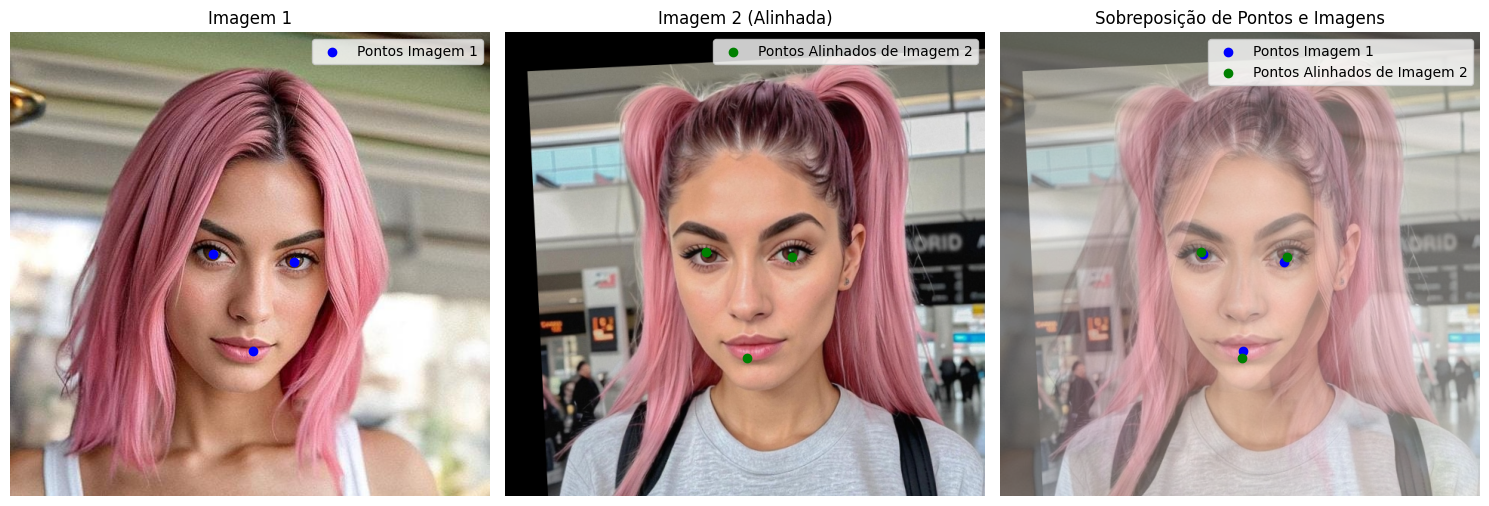

In [ ]:
# Mostrar as três imagens para comparar
plt.figure(figsize=(15, 5))

# Imagem original (image1)
plt.subplot(1, 3, 1)
plt.imshow(image1_rgb)
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='blue', label='Pontos Imagem 1')
plt.title('Imagem 1')
plt.axis('off')  # Oculta os eixos para melhor visualização
plt.legend()

# Imagem alinhada (aligned_image2)
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(aligned_image2, cv2.COLOR_BGR2RGB))
plt.scatter(aligned_points2[:, 0], aligned_points2[:, 1], color='green', label='Pontos Alinhados de Imagem 2')
plt.title('Imagem 2 (Alinhada)')
plt.axis('off')  # Oculta os eixos para melhor visualização
plt.legend()

# Sobreposição das imagens com os pontos
plt.subplot(1, 3, 3)
plt.imshow(image1_rgb, alpha=0.5)  # Define uma transparência para a primeira imagem
plt.imshow(cv2.cvtColor(aligned_image2, cv2.COLOR_BGR2RGB), alpha=0.5)  # Sobrepõe a segunda imagem com transparência
plt.scatter(points_image1[:, 0], points_image1[:, 1], color='blue', label='Pontos Imagem 1')
plt.scatter(aligned_points2[:, 0], aligned_points2[:, 1], color='green', label='Pontos Alinhados de Imagem 2')
plt.title('Sobreposição de Pontos e Imagens')
plt.axis('off')  # Oculta os eixos para melhor visualização
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

O mesmo procedimento pode ser aplicado para alinhar os pontos da imagem 1 com os da imagem 2.

In [ ]:
# Alinhar os pontos da imagem 1 à imagem 2
aligned_points1 = centered_points1 @ R + mean2  # Agora estamos alinhando a imagem 1 à imagem 2

# Calcular a matriz de transformação completa (rotação + translação)
translation = mean2 - R @ mean1  # Translação para alinhar os centros

# Criar a matriz de transformação 2x3
M = np.array([[R[0, 0], R[0, 1], translation[0]],
              [R[1, 0], R[1, 1], translation[1]]])

# Aplicar a transformação para alinhar a imagem 1
aligned_image1 = cv2.warpAffine(image1, M, (image2.shape[1], image2.shape[0]))


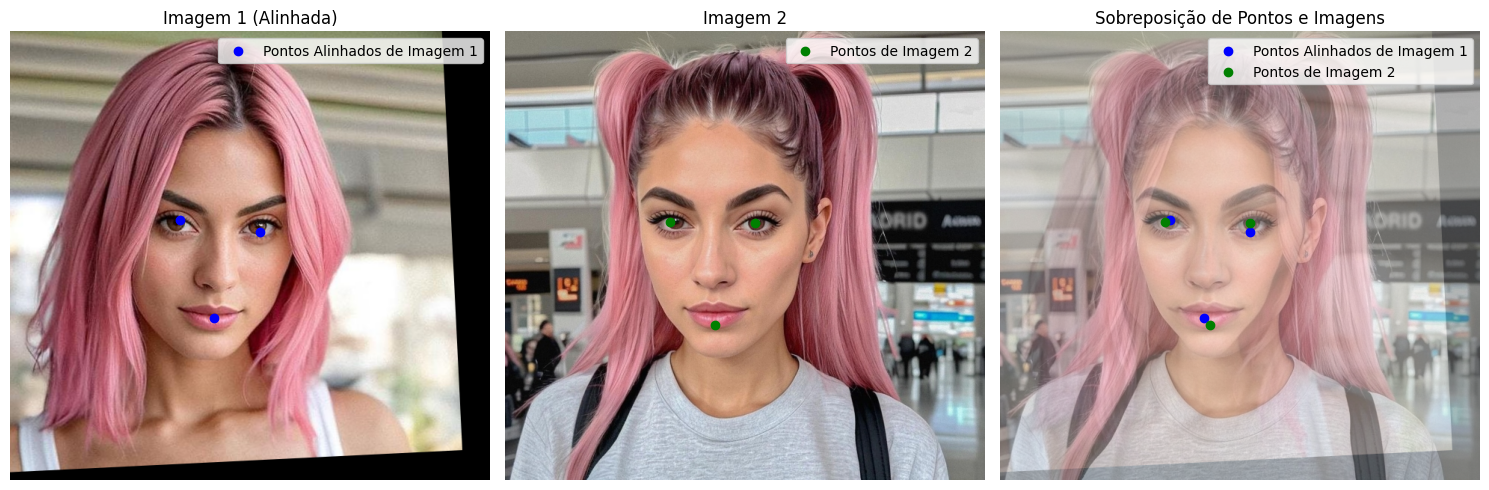

In [ ]:
# Mostrar as três imagens para comparar
plt.figure(figsize=(15, 5))

# Imagem 1 (agora alinhada à imagem 2)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(aligned_image1, cv2.COLOR_BGR2RGB))  # Imagem 1 alinhada
plt.scatter(aligned_points1[:, 0], aligned_points1[:, 1], color='blue', label='Pontos Alinhados de Imagem 1')
plt.title('Imagem 1 (Alinhada)')
plt.axis('off')  # Oculta os eixos para melhor visualização
plt.legend()

# Imagem 2 original
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))  # Imagem 2 original
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='green', label='Pontos de Imagem 2')
plt.title('Imagem 2')
plt.axis('off')  # Oculta os eixos para melhor visualização
plt.legend()

# Sobreposição das imagens com os pontos
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(aligned_image1, cv2.COLOR_BGR2RGB), alpha=0.5)  # Imagem 1 alinhada com transparência
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB), alpha=0.5)  # Imagem 2 original com transparência
plt.scatter(aligned_points1[:, 0], aligned_points1[:, 1], color='blue', label='Pontos Alinhados de Imagem 1')
plt.scatter(points_image2[:, 0], points_image2[:, 1], color='green', label='Pontos de Imagem 2')
plt.title('Sobreposição de Pontos e Imagens')
plt.axis('off')  # Oculta os eixos para melhor visualização
plt.legend()

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()
